In [46]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import warnings
warnings.filterwarnings("ignore")


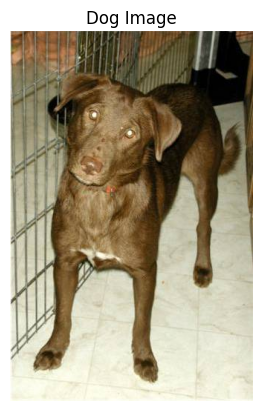

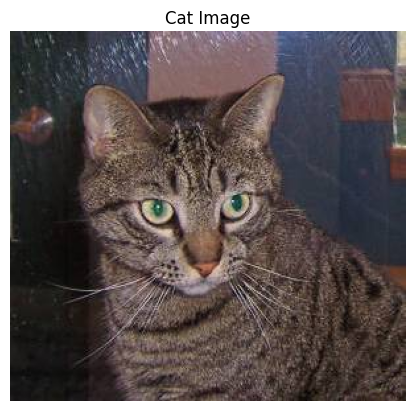

In [47]:
# Load and display the dog image
sample_dog_img = '../data/dog/dog.1.jpg'
dog_img = mpimg.imread(sample_dog_img)
plt.imshow(dog_img)
plt.title("Dog Image")
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Load and display the cat image
sample_cat_img = '../data/cat/cat.1.jpg'
cat_img = mpimg.imread(sample_cat_img)
plt.imshow(cat_img)
plt.title("Cat Image")
plt.axis('off')
plt.show()

In [48]:
# Path to the directory containing your image data
train_data_path = "../data/"

# Data Preprocessing with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Split off 20% for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define training and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Binary classification (cat or dog)
    subset='training',
    classes=['cat', 'dog']  # Only use 'cats' and 'dogs' for training
)

validation_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    classes=['cat', 'dog']  # Only use 'cats' and 'dogs' for validation
)

Found 162 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [49]:
# Build the CNN model with enhancements
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # Increased number of filters
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Keep this to reduce overfitting
    Dense(1, activation='sigmoid')  # Binary classification output
])

In [50]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
# Callbacks to improve training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=2
)

6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4497 - loss: 7.3955 - val_accuracy: 0.5000 - val_loss: 1.5400


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


The model predicts that '80.jpg' is a Cat


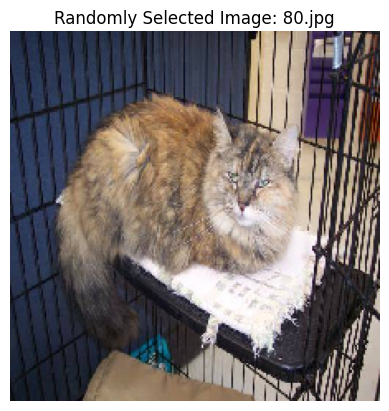

In [111]:
# Evaluating on the test folder
test_data_path = '../data/test/'

# Get a list of all images in the test folder
test_images = [f for f in os.listdir(test_data_path) if f.endswith('.jpg')]

# Randomly select an image
random_image_filename = random.choice(test_images)
random_image_path = os.path.join(test_data_path, random_image_filename)

# Load and preprocess the image
img = load_img(random_image_path, target_size=(224, 224))  # Resize to match model input
img_array = img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

prediction = model.predict(img_array)

# Interpret the prediction
if prediction < 0.5:
    print(f"The model predicts that '{random_image_filename}' is a Cat")
else:
    print(f"The model predicts that '{random_image_filename}' is a Dog")


plt.imshow(img_array[0])  # Remove the batch dimension for display
plt.axis('off')
plt.title(f"Randomly Selected Image: {random_image_filename}")
plt.show()


In [112]:
# Evaluate the model on the entire test set
correct = 0
total = len(test_images)

for filename in test_images:
    filepath = os.path.join(test_data_path, filename)
    img = load_img(filepath, target_size=(224, 224))  # Resize to match input
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)[0][0]  # Extract the prediction

    # Determine the true label based on the filename
    true_label = 0 if "cat" in filename.lower() else 1  # Assumes filenames indicate labels
    predicted_label = 1 if prediction >= 0.5 else 0

    if predicted_label == true_label:
        correct += 1

accuracy = correct / total
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

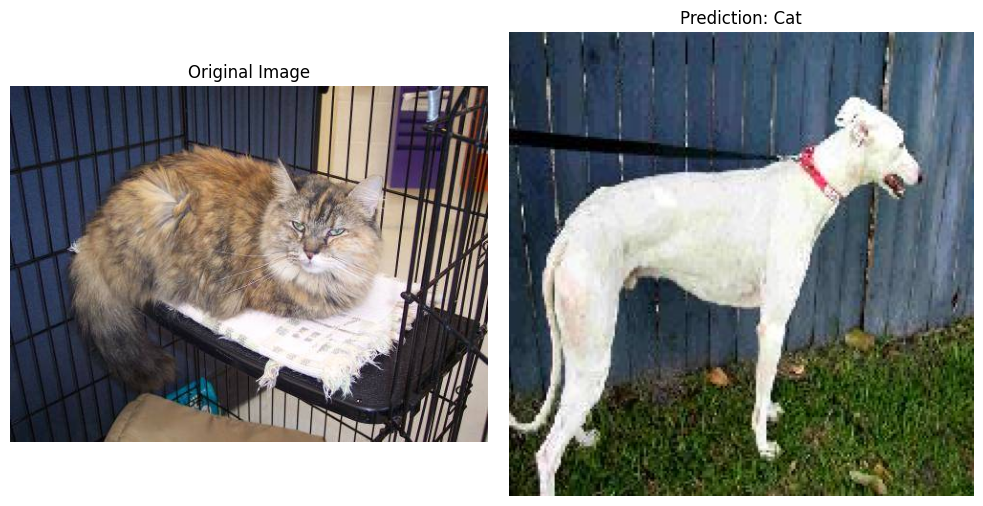

In [113]:
# Visualize the test image and prediction
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display original test image
original_img = mpimg.imread(random_image_path)
ax[0].imshow(original_img)
ax[0].axis('off')
ax[0].set_title("Original Image")

# Display preprocessed image with prediction
ax[1].imshow(img_array[0])  # Remove batch dimension
ax[1].axis('off')
ax[1].set_title(f"Prediction: {'Dog' if prediction >= 0.5 else 'Cat'}")

plt.tight_layout()
plt.show()


In [114]:
# Check class distribution in training and validation datasets
print("Class Indices:", train_generator.class_indices)  # Shows the mapping of labels to integers
print("Number of samples in training set:", train_generator.samples)
print("Number of samples in validation set:", validation_generator.samples)


Class Indices: {'cat': 0, 'dog': 1}
Number of samples in training set: 162
Number of samples in validation set: 40


In [115]:
from sklearn.metrics import precision_recall_curve

# Get validation predictions
val_predictions = model.predict(validation_generator)
val_labels = validation_generator.classes  # True labels from the validation generator

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(val_labels, val_predictions)

# Find the threshold that maximizes precision + recall
optimal_idx = np.argmax(precision + recall)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
Optimal Threshold: 0.027856342494487762


The model predicts that '80.jpg' is a Dog


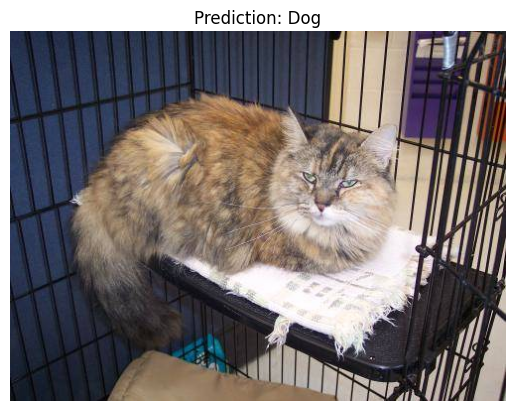

In [116]:
# Use optimal threshold for prediction
if prediction >= optimal_threshold:
    predicted_class = "Dog"
else:
    predicted_class = "Cat"

# Print the prediction
print(f"The model predicts that '{random_image_filename}' is a {predicted_class}")

# Load and display the original image (not the preprocessed one)
original_img = mpimg.imread(random_image_path)  # Read the original image
plt.imshow(original_img)  # Display the original image
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()


In [117]:
# # Define the model save path
# model_save_path = 'model/cat_dog_image_classifying_model.keras'

# # Create the model folder if it doesn't exist
# os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# # Save the model in the specified folder
# model.save(model_save_path)

# # Output confirmation
# print(f"Model saved to {model_save_path}")